# Visualizing Earnings Based on College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
    - Using scatter plots
- How many majors are predominantly male? Predominantly female?
    - Using histograms
- Which category of majors have the most students?
    - Using bar plots

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

We can load in the csv and check to make sure we can see the first row.

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

Let's get familiar with the structure of the data.

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


The next step is to drop any row with missing values.

In [6]:
raw_data_count = recent_grads.shape[0]

recent_grads = recent_grads.dropna()

cleaned_data_count = recent_grads.shape[0]

print(raw_data_count)
print(cleaned_data_count)

173
172


As you can see, we just shaved off one row.

## Scatter Plots

We are going to general multiple scatter plots to explore the following relationships:

- `Sample_size` and `Median`
- `Sample_size` and `Unemployment_rate`
- `Full_time` and `Median`
- `ShareWomen` and `Unemployment_rate`
- `Men` and `Median`
- `Women` and `Median`

### Sample Size vs. Medain Salaries

As the sample size grows, we can see the median salary fall within 35-50k. The smaller sample size seem to have a much higher variety of results.

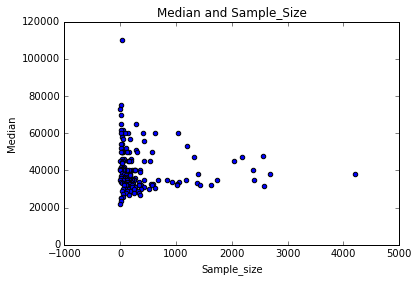

In [7]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median and Sample_Size')

### Sample Size vs. Unemployment Rates

As the sample size grows, we can see the unemployment rate fall between .05 and .10. Again, the smaller sample sizes bring a much more varied result.

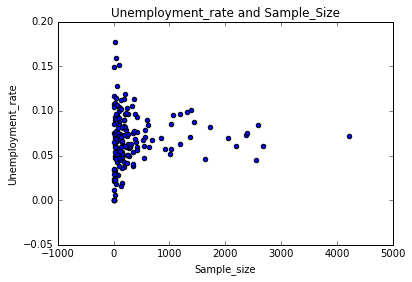

In [8]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Unemployment_rate and Sample_Size')

### Full time vs. Medain Salaries

As the number of full time graduates increases, we can see the median salary fall within 35-50k.

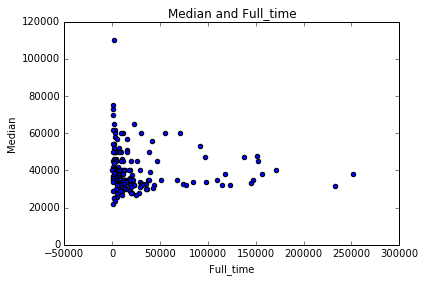

In [9]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Median and Full_time')

### Shar of Female Grads vs. Unemployment Rate

There does not seem to be a relation between the share of female graduates and unemploymeny rate, due to the high variety of data.

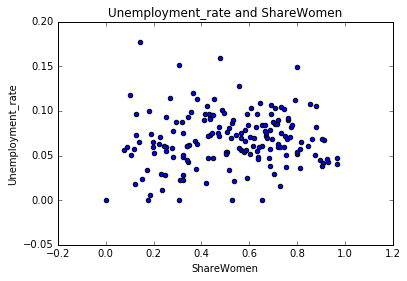

In [10]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Unemployment_rate and ShareWomen')

### Male Grads vs. Medain Salaries

As the amount of male graduates grow, we can see that the median salary falls between 35-60k.

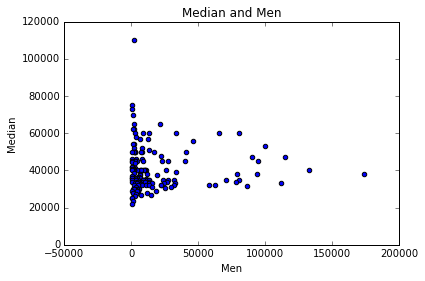

In [11]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Median and Men')

### Women Grads vs. Medain Salaries

As the amount of female graduates grow, we can see that the median salary falls between 35-50k.

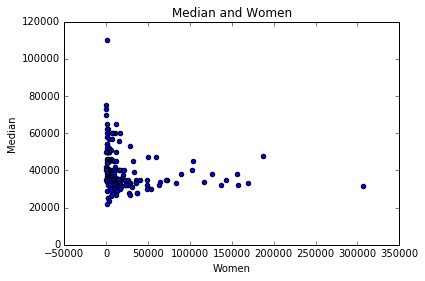

In [12]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Median and Women')

We can see a couple of things from this set of plots.

First, students in more popular majors do not necessarily make more money. If we look at the Median and Full_time chart, the data falls pretty much around the same area, with the data more on the right falling within the 30-50k range.

Second, female graduates do not make more money than male counterparts. We can see that males can make up to 10k more in more popular majors.

## Histograms

We are now going to genereate some histograms based on the following columns:

- `Sample_size`
- `Median`
- `Employed`
- `Full_time`
- `ShareWomen`
- `Unemployment_rate`
- `Men`
- `Women`

### Sample Size

There is a much higher frequency of smaller sample sizes in the data.

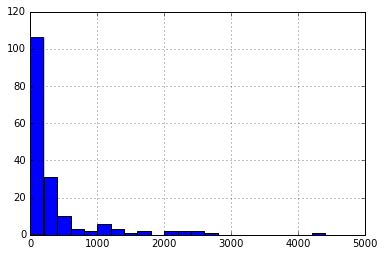

In [13]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

### Median Salary

The highest median salary seems to sit around the 35k mark.

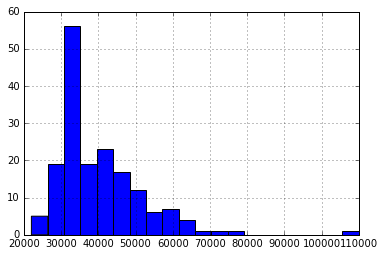

In [14]:
recent_grads['Median'].hist(bins=20)

### Employed

The histogram shows that there are major categories that have more graduate employment.

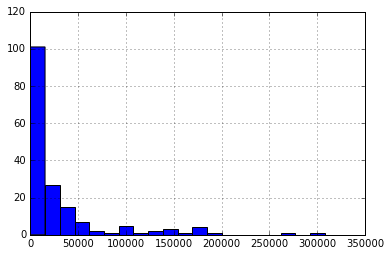

In [15]:
recent_grads['Employed'].hist(bins=20)

### Full-time Graduates

In popular major categories, there is much more full-time employment.

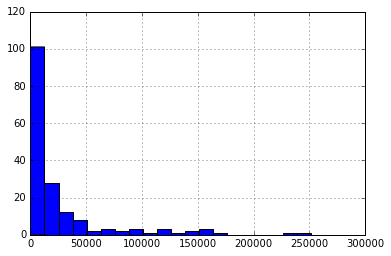

In [16]:
recent_grads['Full_time'].hist(bins=20)

### Share of Women Graduates

The highest share of women graduates is about 0.7.

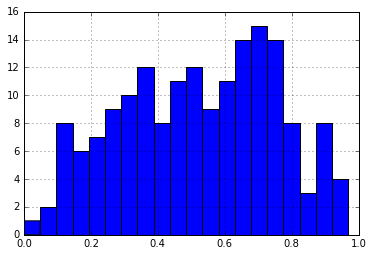

In [17]:
recent_grads['ShareWomen'].hist(bins=20)

### Unemployment Rate

The highest frequency of unemployment rate is around 0.06.

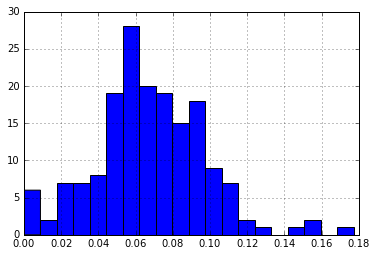

In [18]:
recent_grads['Unemployment_rate'].hist(bins=20)

### Male Graduates

Shows that certain major categories had more male graduates.

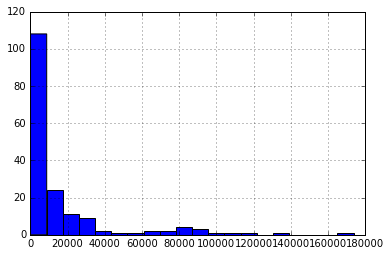

In [19]:
recent_grads['Men'].hist(bins=20)

### Female Graduates

Shows that certain major categories had more female graduates.

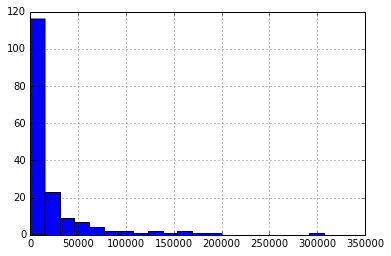

In [20]:
recent_grads['Women'].hist(bins=20)

## Scatter Matrix Plot

Lets create some scatter matrix plots to find better correlation between columns. First, we need to import scatter matrix plots from pandas.plotting.

In [21]:
from pandas.plotting import scatter_matrix

First, let's create a 2 x 2 with the `Sample_size` and `Median` columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6c0e56470>,
      dtype=object)

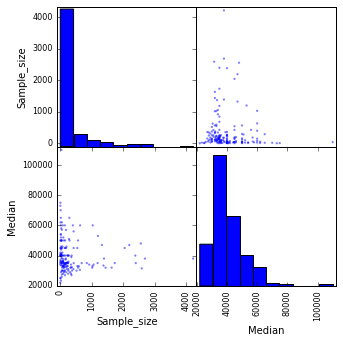

In [22]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(5,5))

We can also create a 3 x 3 using the `Sample_size`, `Median`, and `Unemployment Rate` columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6c0c06b70>,
      dtype=object)

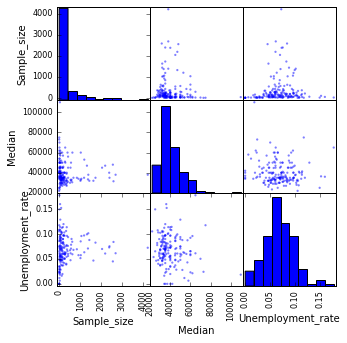

In [23]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(5,5))

## Bar Plots

We can use bar plots to compare the first and last ten rows of the data as well. Let's start with the share of women graduates.

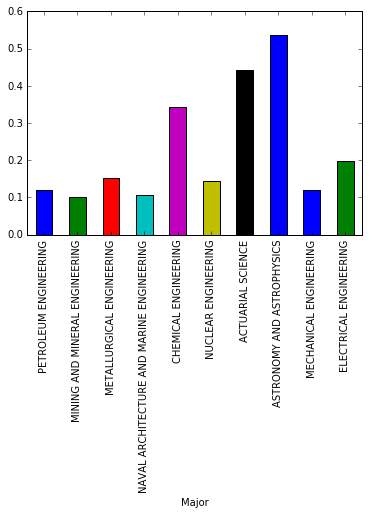

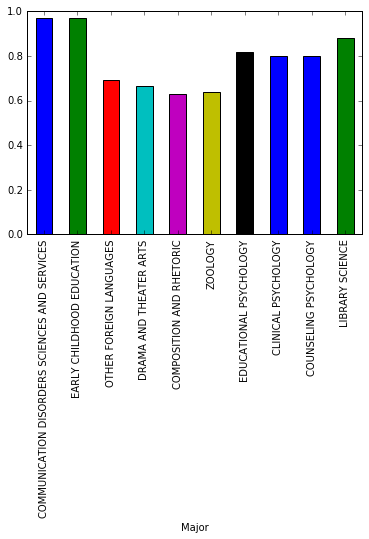

In [24]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=False)

Now let's look at the Unemployment rate.

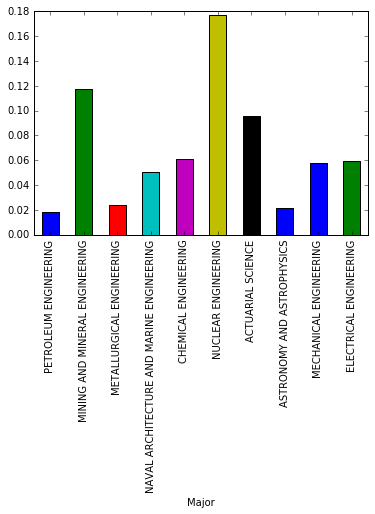

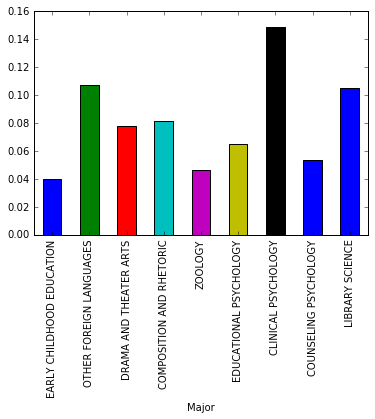

In [25]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)

## Next Steps

In this guided project, we learned how to use the plotting tools built into pandas to explore data on job outcomes. If you head over to the documentation on plotting in pandas, you'll notice that there's built in support for many more plots.

We encourage you to keep exploring these other visualizations on your own. Here are some ideas:

- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.